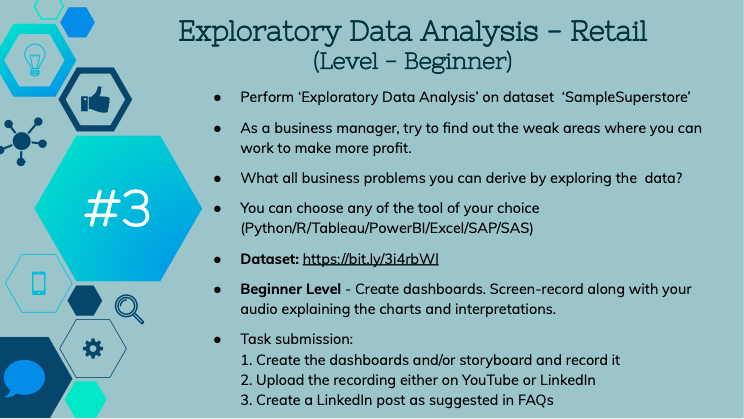

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Zitishk/GRIP-SPARKS/main/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.describe(include=[np.number])

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
data.describe(include=[np.object])

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


### From the above describtion we can see that
- There are 4 shipment modes in which the ~60% is Standard Class
- There are 3 Segments in which the ~50% are Consumers
- Only US data is available
- There are more than 500 cities
- There are 49 states in which the most freq is california
- There are 4 Regions in which 33% is West
- There are 3 categories yet 60% is office supplies
- There are 17 sub categories

# Objectives
1. Region and State
    - How are profit and sales distributed in different regions/States
2. Ship Mode
    - Which mode of shipment is the prefered by customers
    - Which mode of shipment has more profit per order
3. Categories and Sub-Category
    - How is profit distributed between various categories and sub categories
4. Discount
    - How is profit affected by discounts

In [5]:
#Region and State
df1 = data.groupby(['Region','State'])[['Sales','Profit']].sum()
df1.head()

Sales      Profit
Region  State                          
Central Illinois  80166.101 -12607.8870
        Indiana   53555.360  18382.9363
        Iowa       4579.760   1183.8119
        Kansas     2914.310    836.4435
        Michigan  76269.614  24463.1876

In [6]:
df0 = df1.sort_values(by='Profit')
df1 = df1.groupby('Region', group_keys=False).apply(lambda x: x.sort_values(by='Profit'))
df1.reset_index(inplace=True)
df0.reset_index(inplace=True)

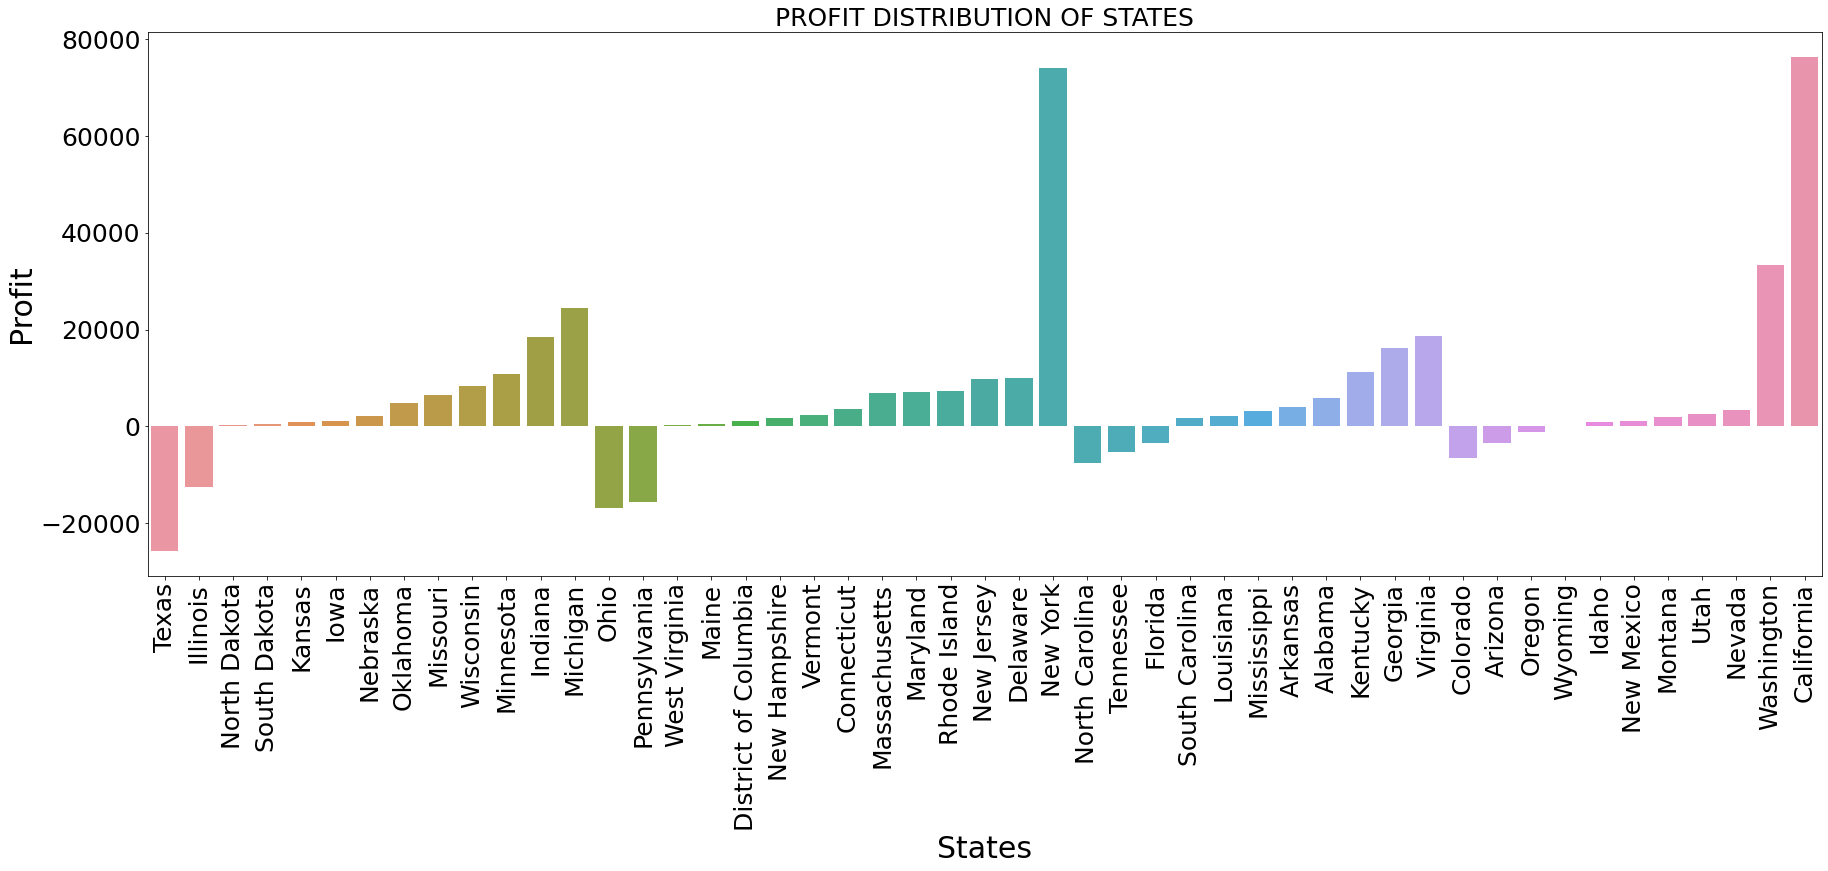

In [18]:
mt.figure(figsize=(30,10))
sns.barplot(data=df1,x='State',y='Profit')
mt.xticks(fontsize=25,rotation=90)
mt.yticks(fontsize=25)
mt.ylabel('Profit',fontsize=30)
mt.xlabel('States',fontsize=30)
mt.title('PROFIT DISTRIBUTION OF STATES',fontsize=25)
mt.show()

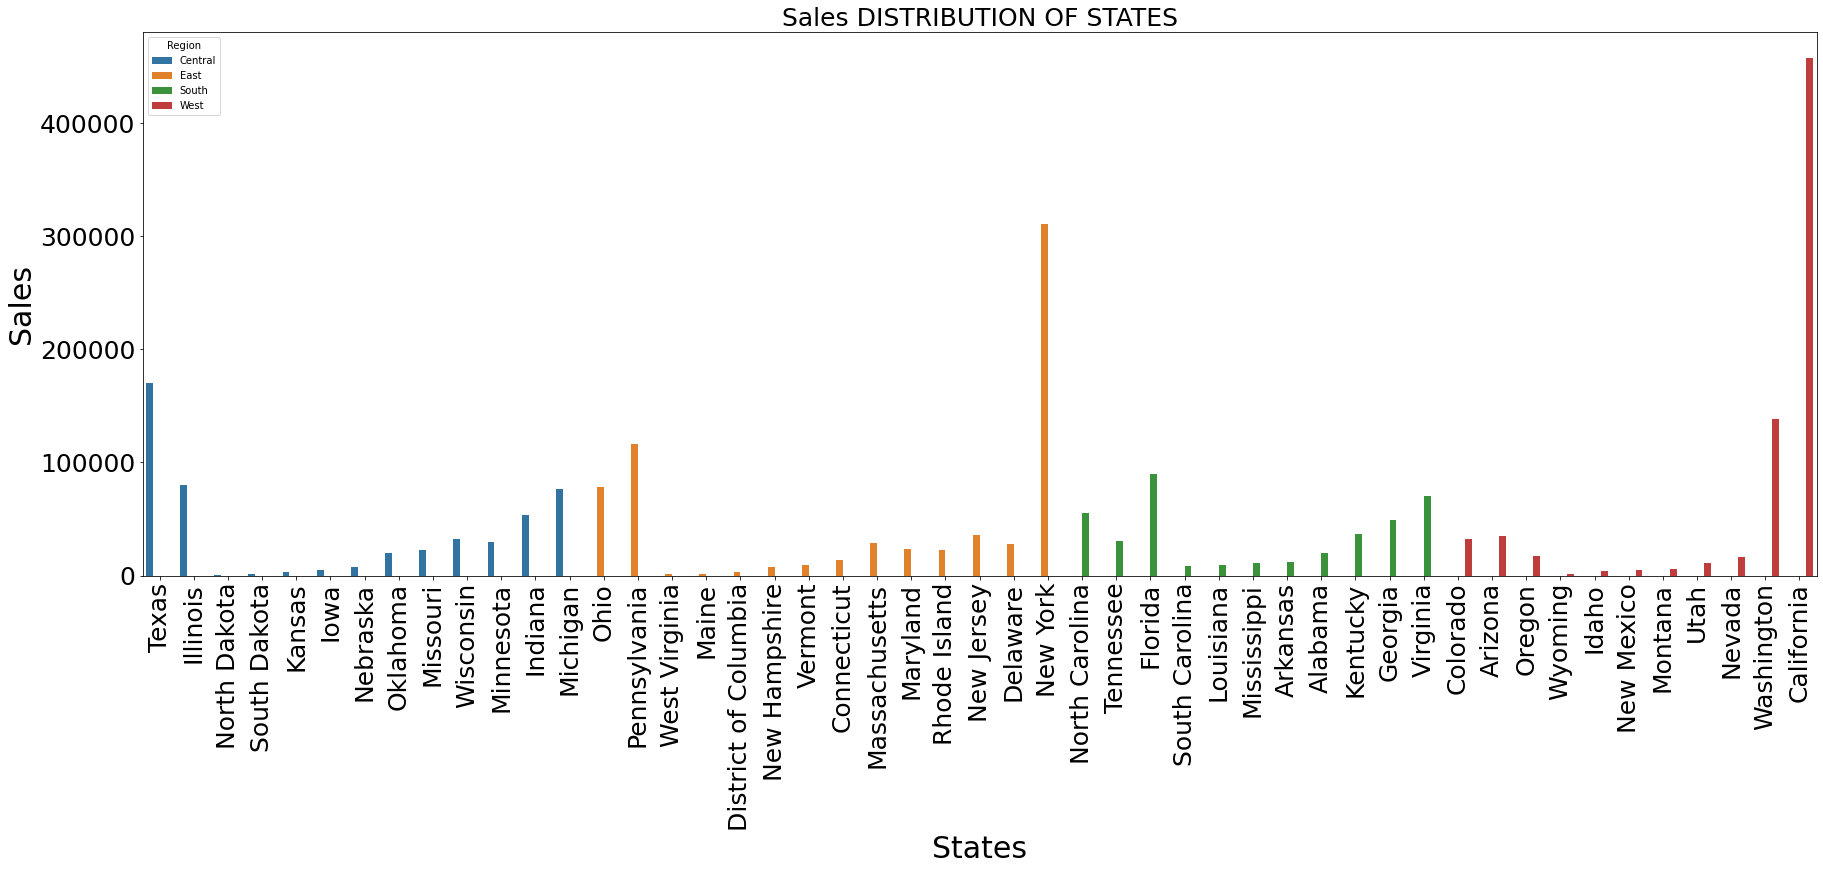

In [19]:
mt.figure(figsize=(30,10))
sns.barplot(data=df1,x='State',y='Sales',hue='Region')
mt.xticks(fontsize=25,rotation=90)
mt.yticks(fontsize=25)
mt.ylabel('Sales',fontsize=30)
mt.xlabel('States',fontsize=30)
mt.title('Sales DISTRIBUTION OF STATES',fontsize=25);
mt.show()

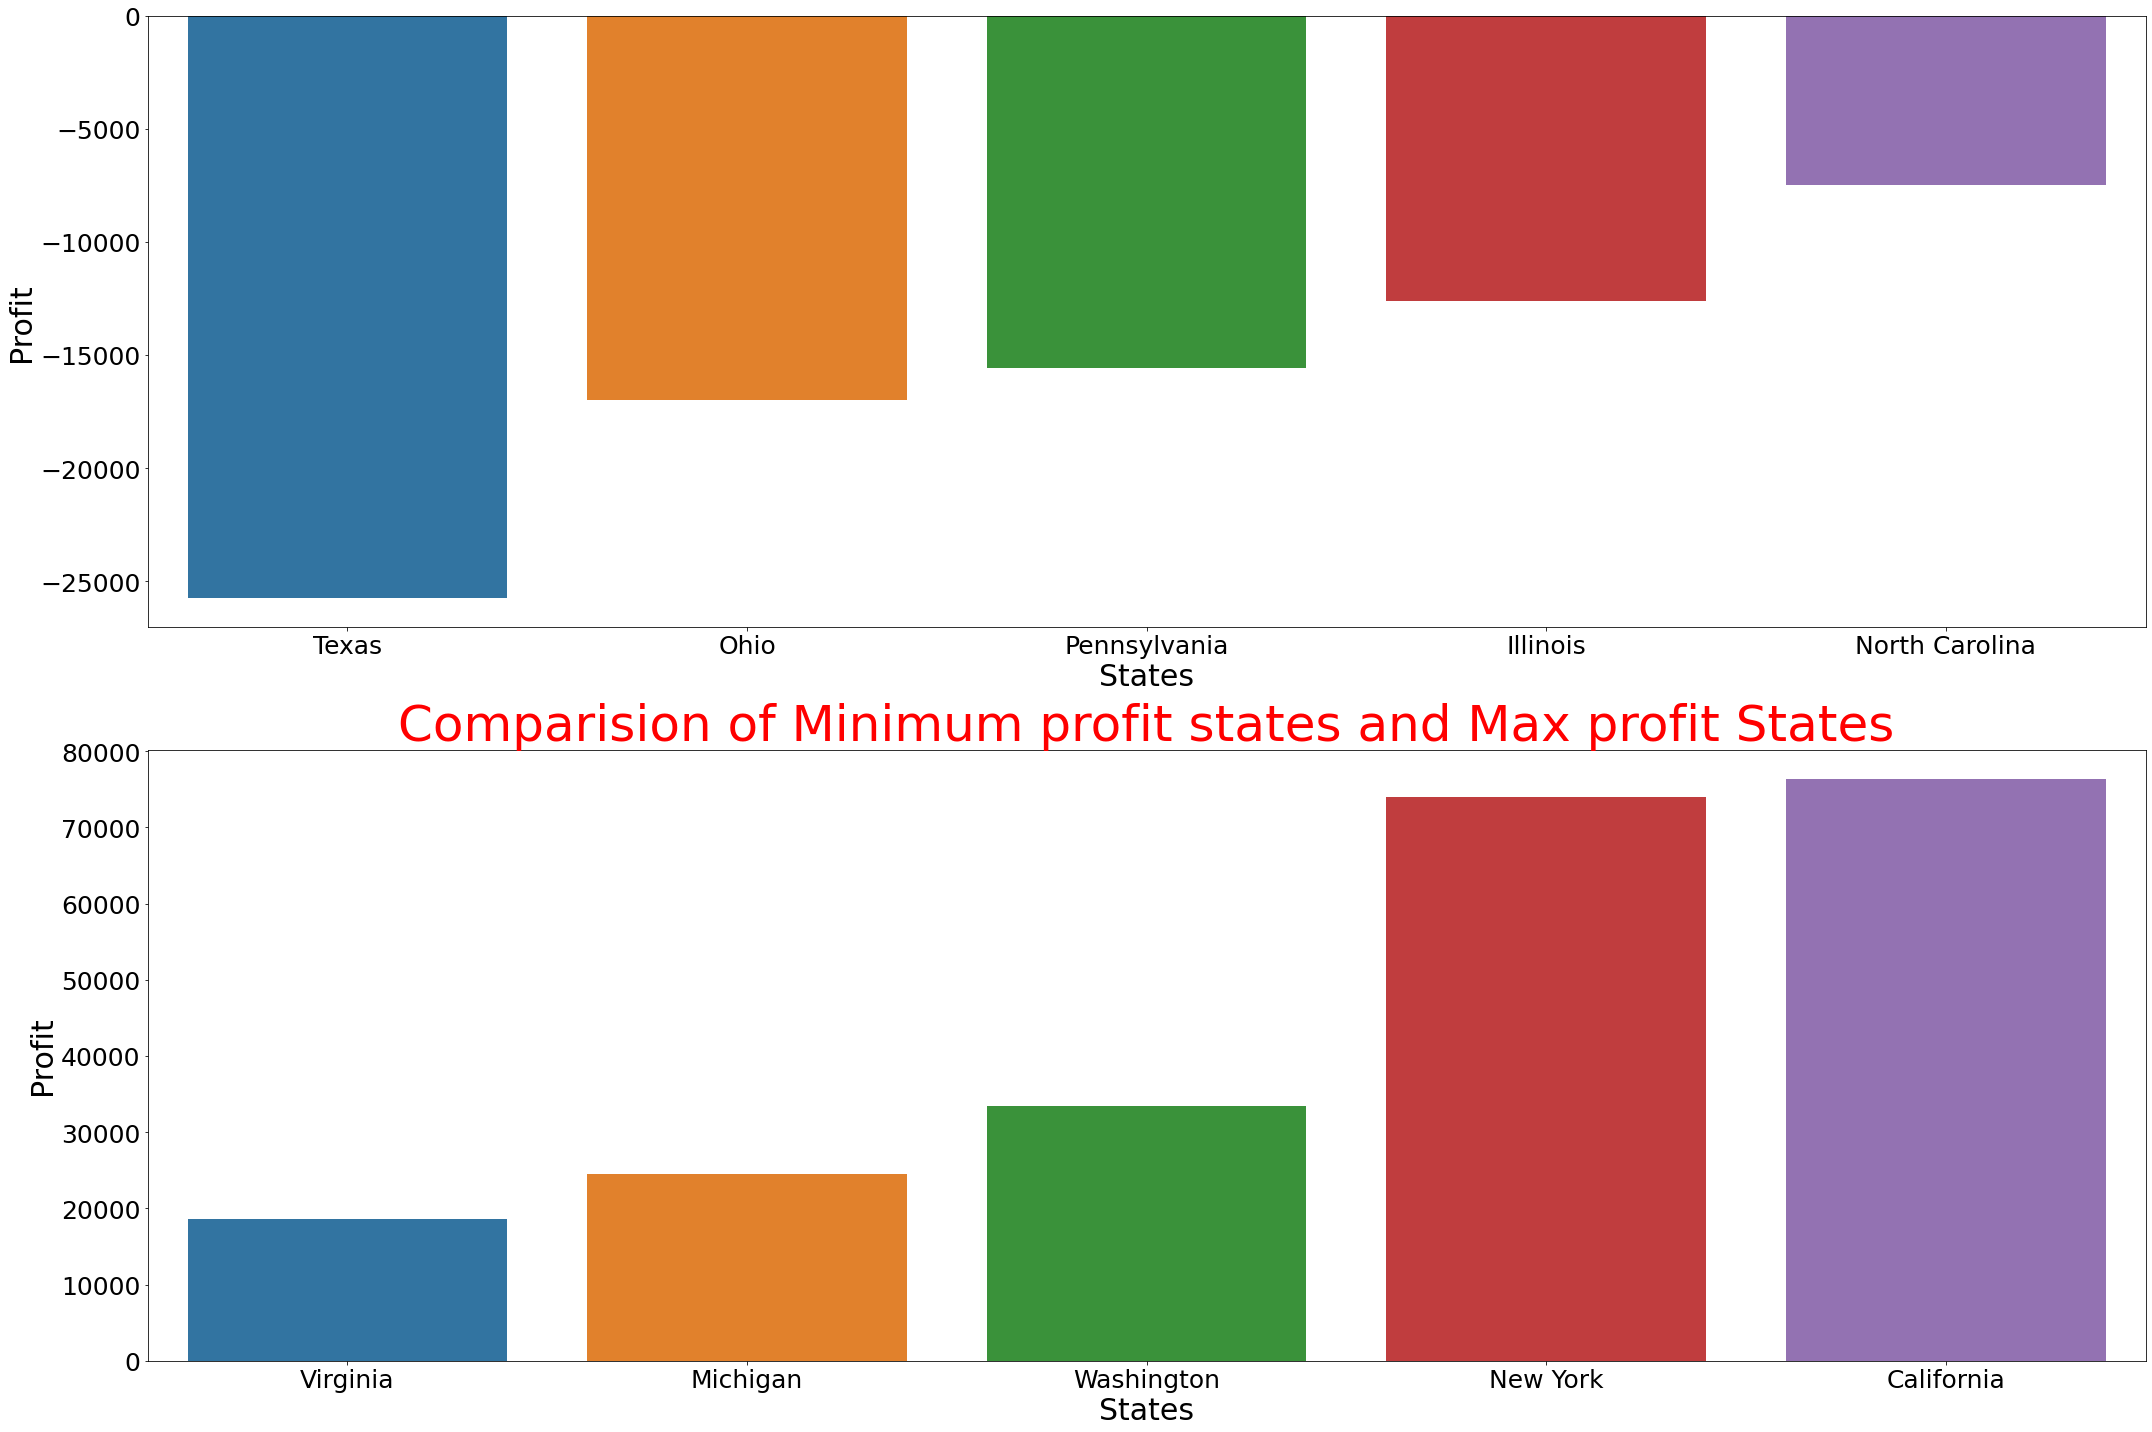

In [9]:
fig, axes = mt.subplots(2, 1, sharey=False, figsize=(30,20))
sns.barplot(ax = axes[0],data=df0.head(5),x='State',y='Profit')
sns.barplot(ax= axes[1],data=df0.tail(5),x='State',y='Profit')
for ax in axes:
    mt.sca(ax)
    mt.xticks(fontsize=25,color='black')
    mt.yticks(fontsize=25,color='black')
    mt.ylabel('Profit',fontsize=30)
    mt.xlabel('States',fontsize=30)
mt.title('Comparision of Minimum profit states and Max profit States',fontsize=50,color='r')
mt.tight_layout()
mt.show()

In [10]:
df2 = data.groupby('Ship Mode')['Profit'].agg(['sum','count'])
df2['Profit Per Unit'] = df2['sum']/df2['count']

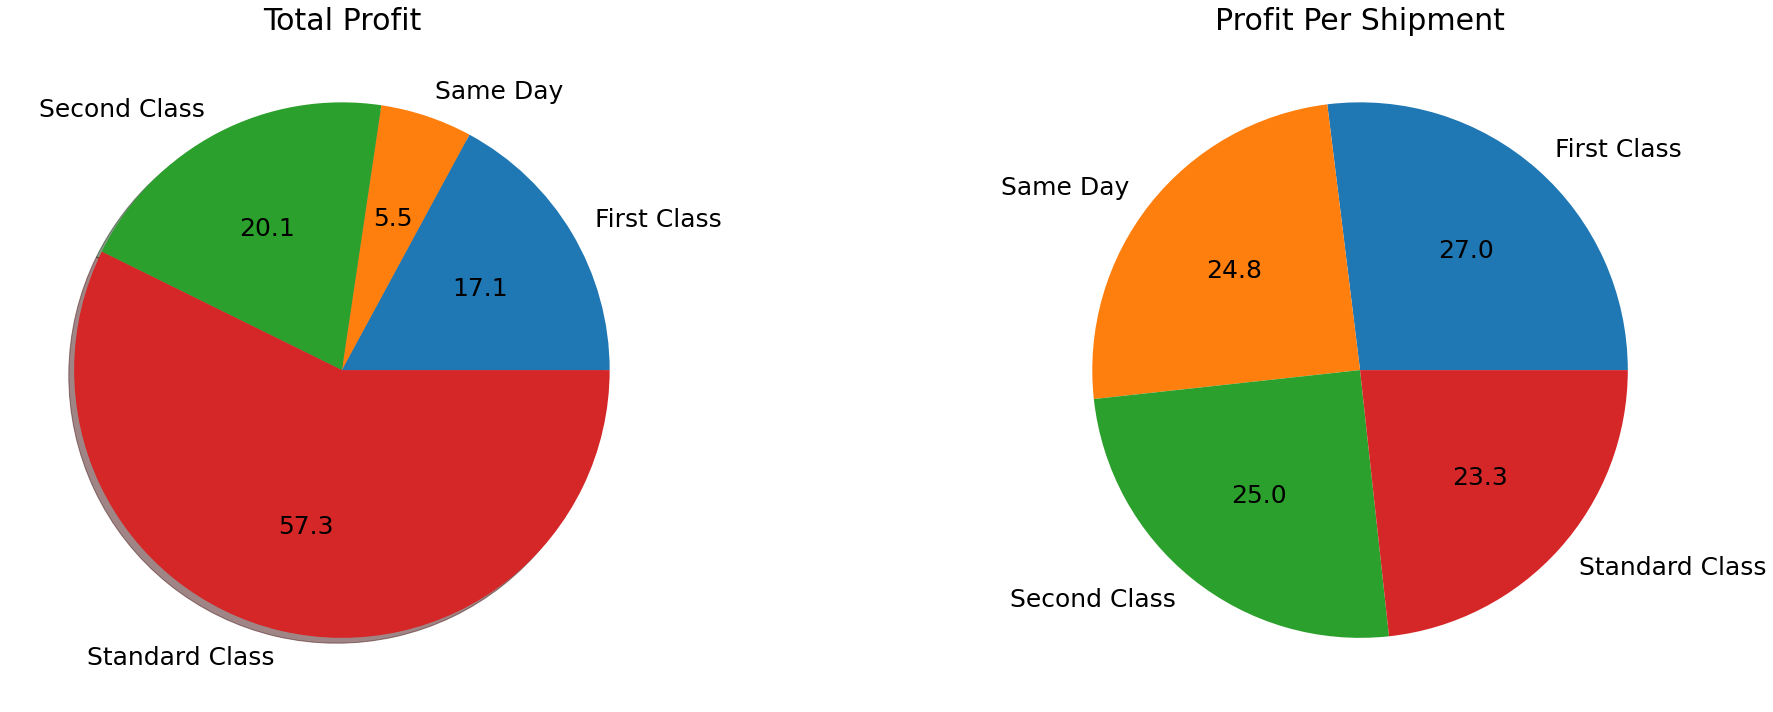

In [11]:
fig,ax = mt.subplots(1,2,figsize=(30,10))
ax[0].pie(df2['sum'],labels=df2.index , autopct='%0.1f',textprops={'fontsize': 25},shadow=True)
ax[0].set_title('Total Profit',fontsize=30)
ax[1].pie(df2['Profit Per Unit'],labels=df2.index , autopct='%0.1f',textprops={'fontsize': 25})
ax[1].set_title('Profit Per Shipment',fontsize=30)
mt.tight_layout()
mt.show()

In [12]:
df3 = data.groupby('Segment')['Profit'].agg(['sum','count'])
df3['Profit Per Unit'] = df3['sum']/df3['count']

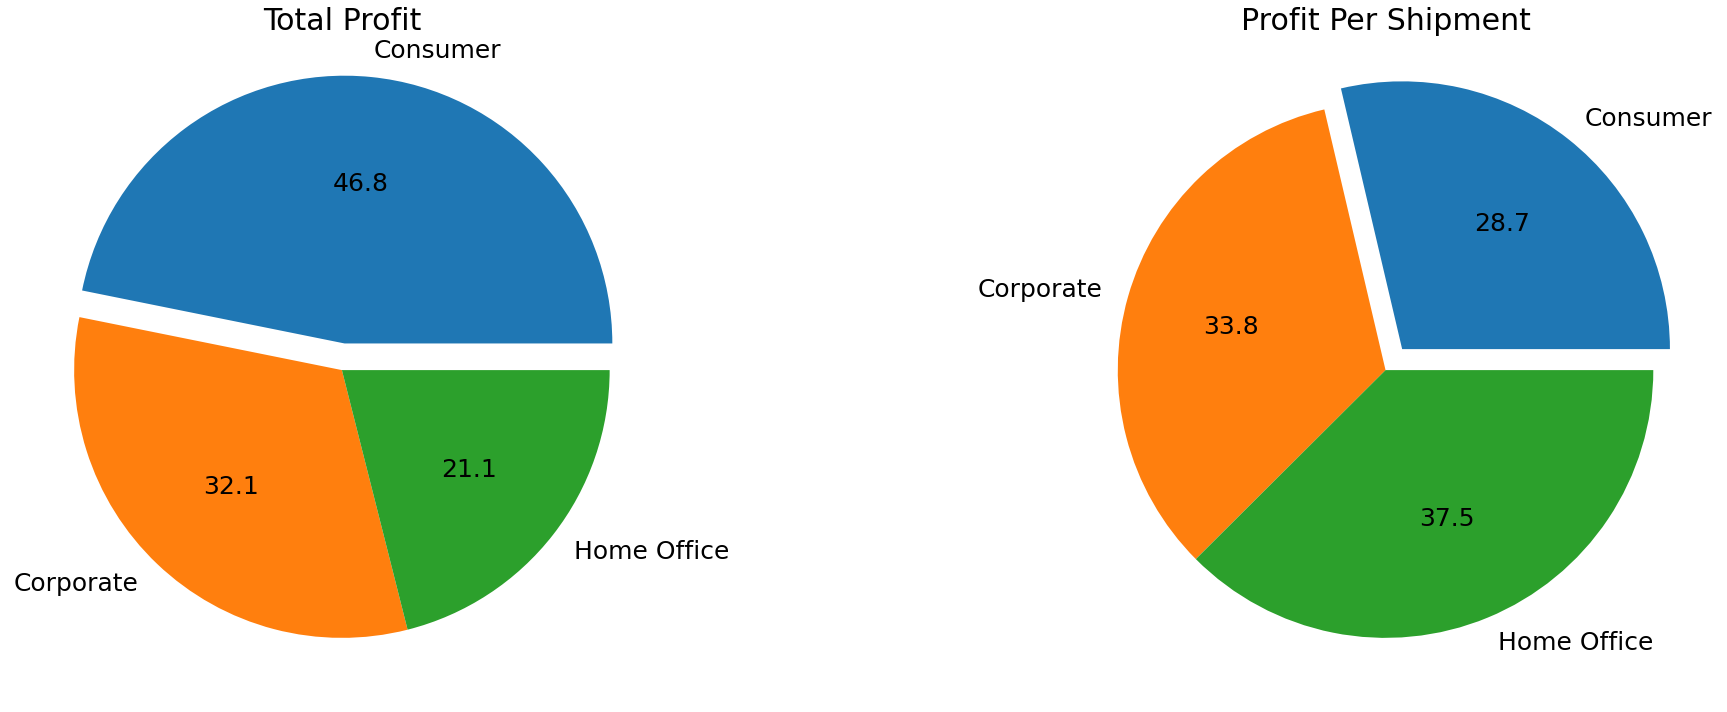

In [14]:
fig,ax = mt.subplots(1,2,figsize=(30,10))
ax[0].pie(df3['sum'],labels=df3.index , autopct='%0.1f',textprops={'fontsize': 25},explode=(0.1,0,0))
ax[0].set_title('Total Profit',fontsize=30)
ax[1].pie(df3['Profit Per Unit'],labels=df3.index , autopct='%0.1f',explode=(0.1,0,0),textprops={'fontsize': 25})
ax[1].set_title('Profit Per Shipment',fontsize=30)
mt.tight_layout()
mt.show()

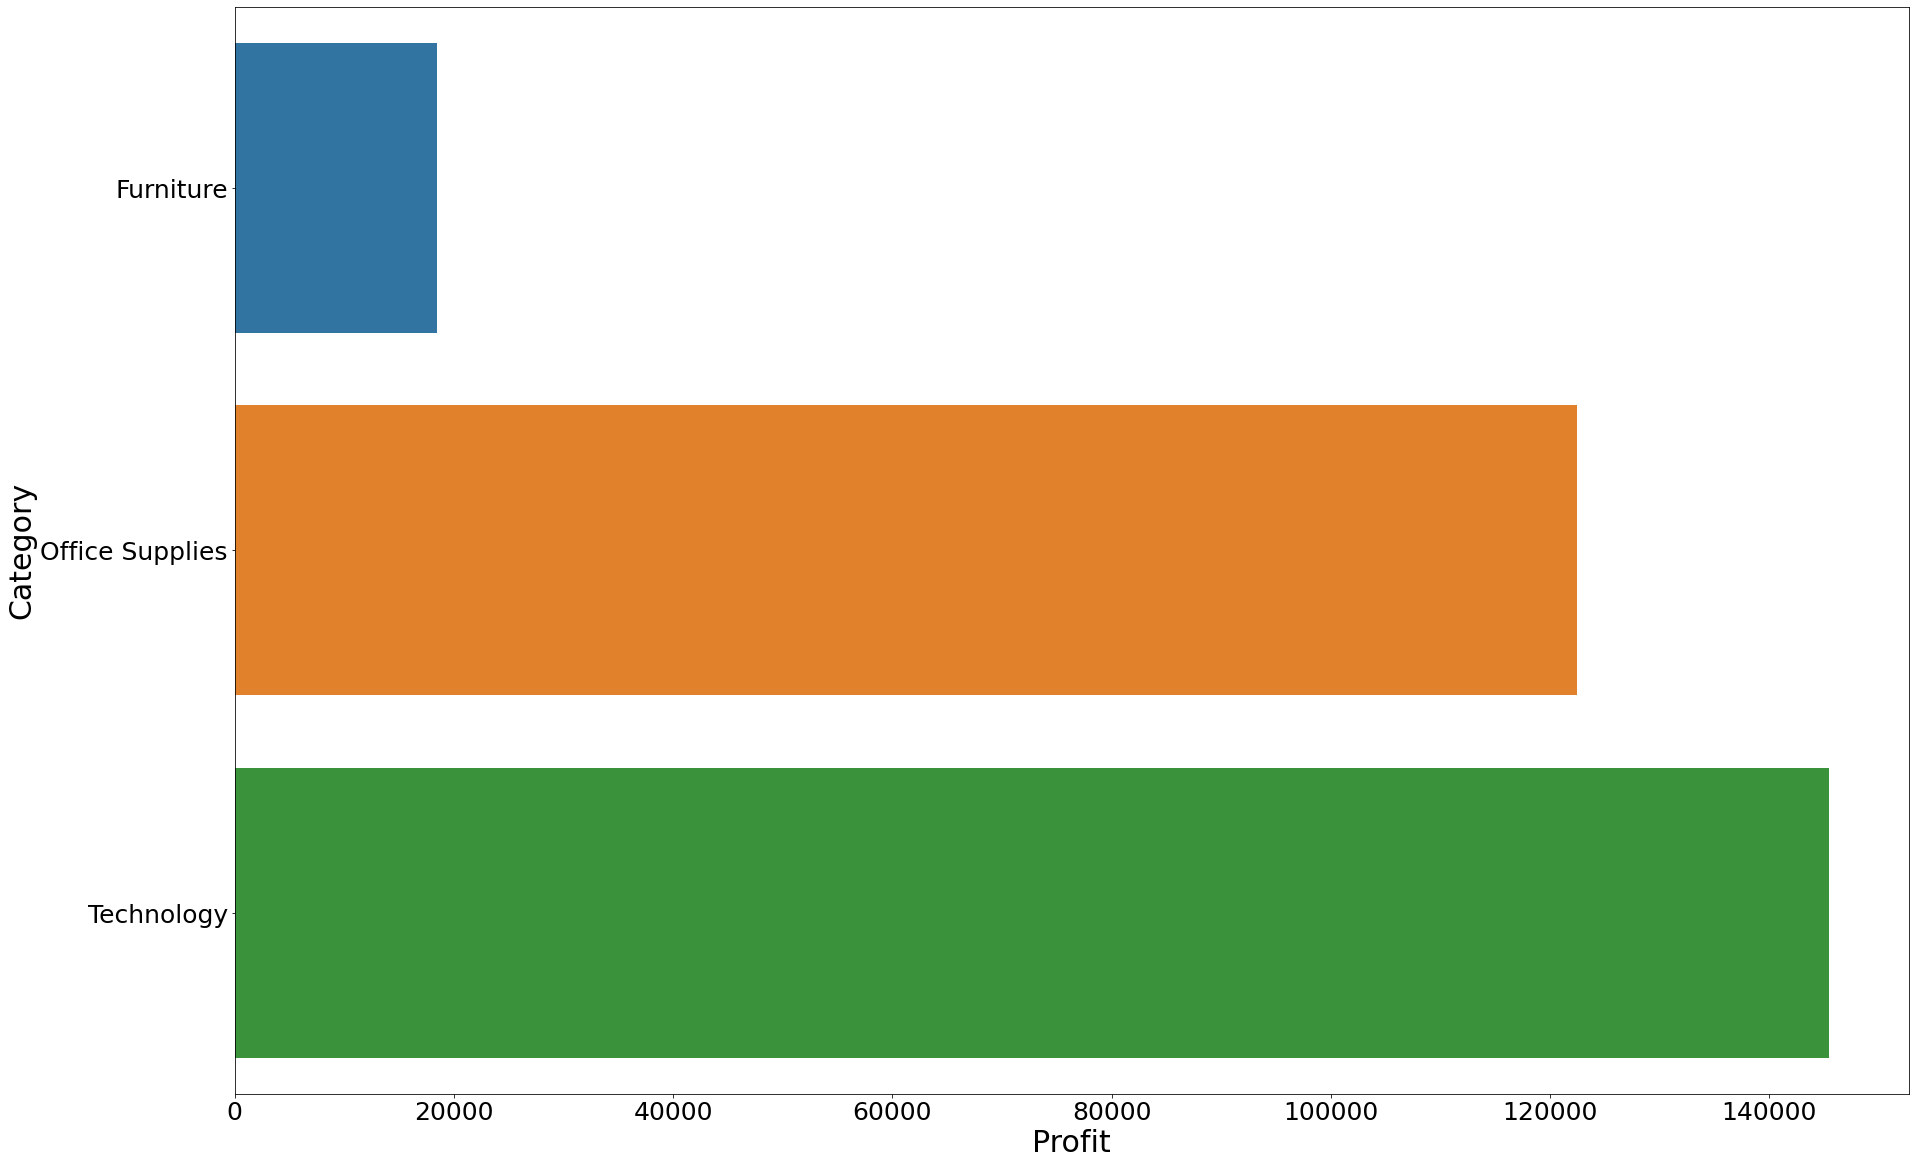

In [21]:
df4 = data.groupby('Category')[['Sales','Profit']].sum()
df4.head()
mt.figure(figsize=(30,20))
sns.barplot(x='Profit',y=df4.index,data=df4)
mt.xticks(fontsize=25)
mt.yticks(fontsize=25)
mt.xlabel('Profit',fontsize=30)
mt.ylabel('Category',fontsize=30)
mt.show()

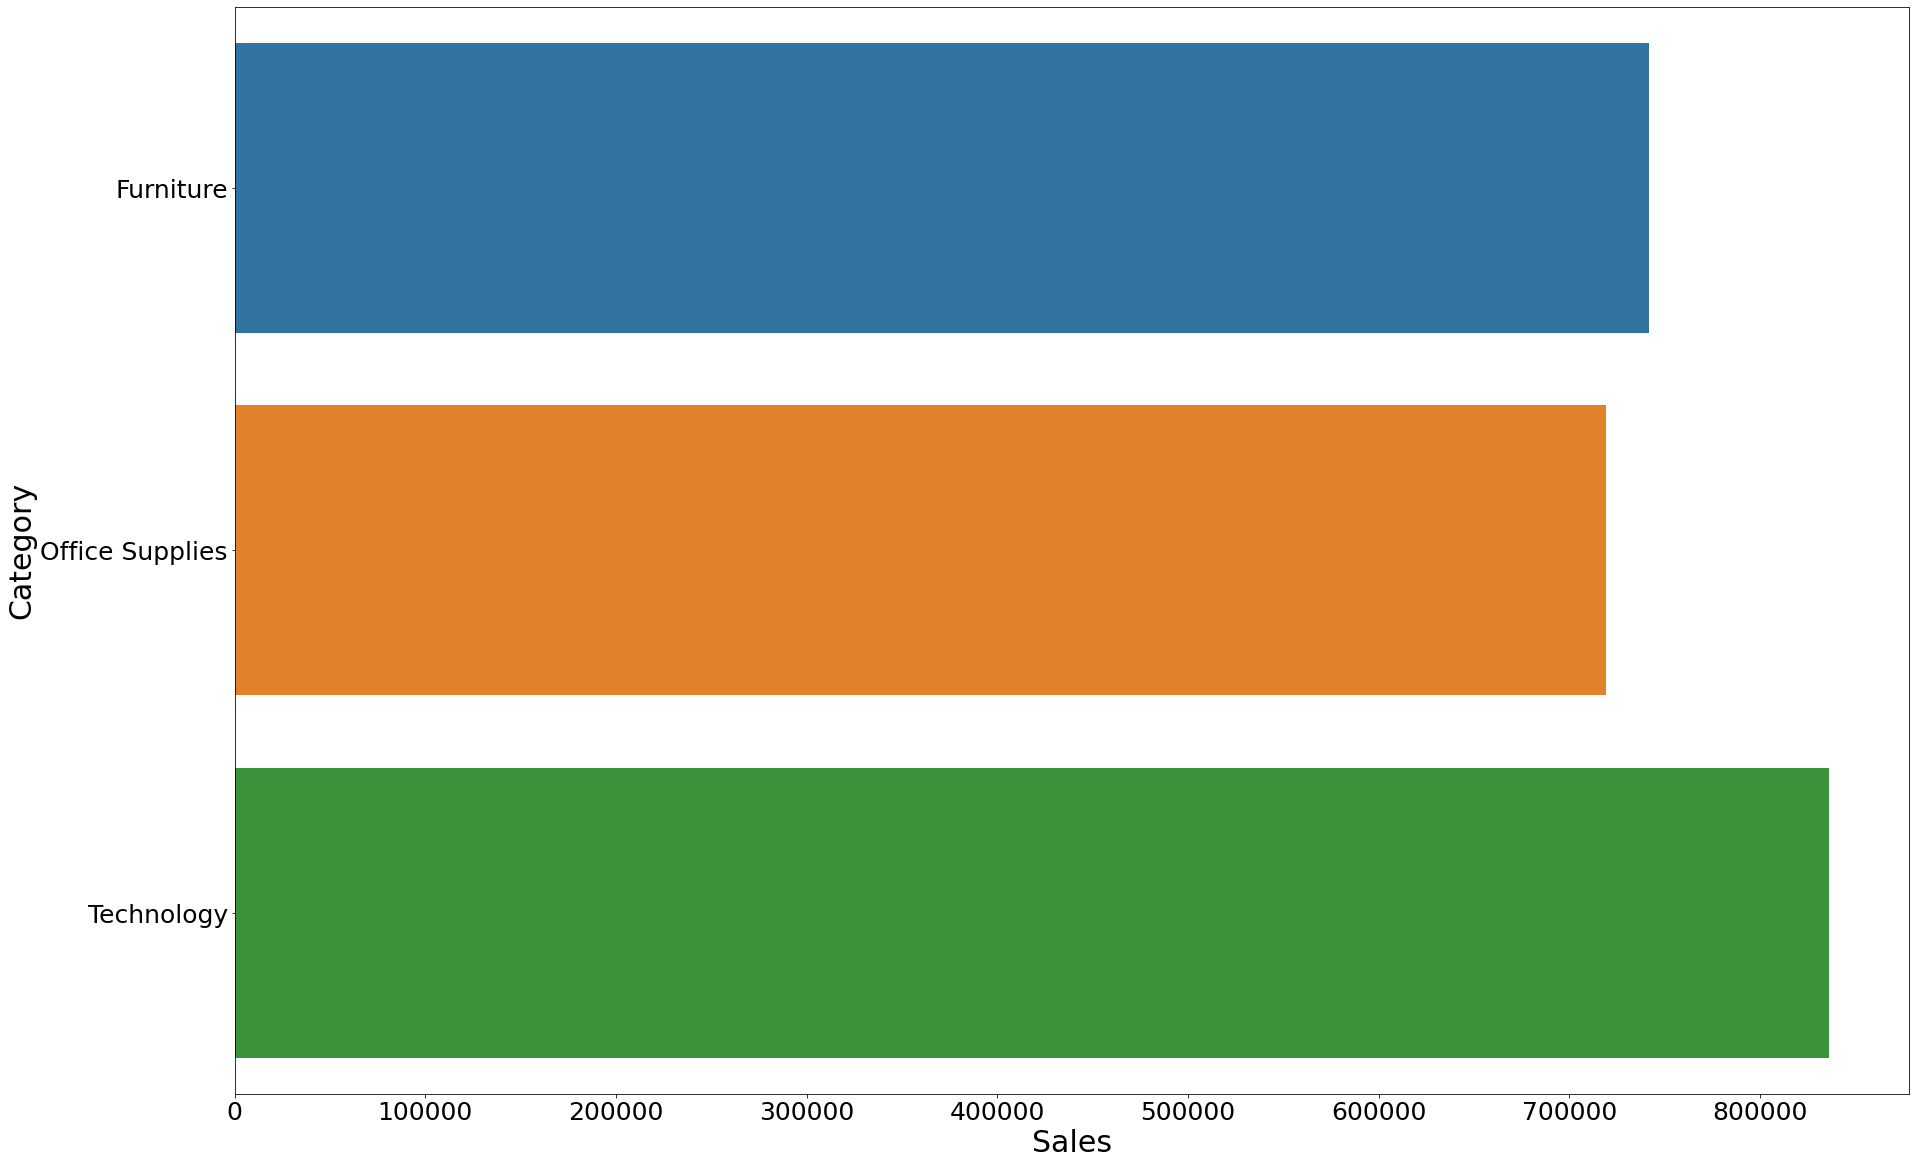

In [22]:
df4 = data.groupby('Category')[['Sales','Profit']].sum()
df4.head()
mt.figure(figsize=(30,20))
sns.barplot(x='Sales',y=df4.index,data=df4)
mt.xticks(fontsize=25)
mt.yticks(fontsize=25)
mt.xlabel('Sales',fontsize=30)
mt.ylabel('Category',fontsize=30)
mt.show()

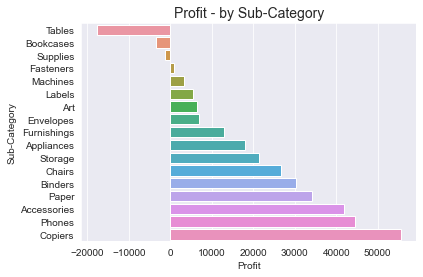

In [23]:
df5 = data.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Profit')
sns.set_style('darkgrid')
sns.barplot(x='Profit',y=df5.index,data=df5)
mt.title('Profit - by Sub-Category', fontsize=14)
mt.show()

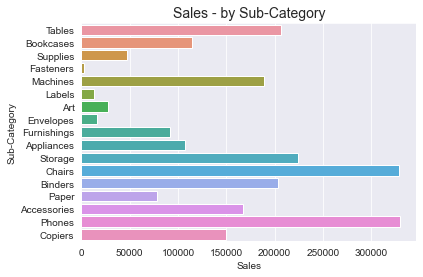

In [24]:
df5 = data.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Profit')
sns.set_style('darkgrid')
sns.barplot(x='Sales',y=df5.index,data=df5)
mt.title('Sales - by Sub-Category', fontsize=14)
mt.show()

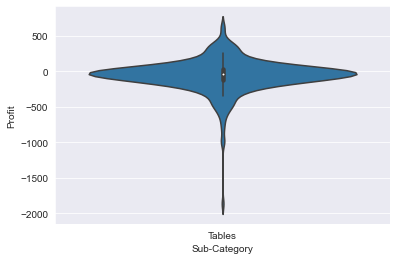

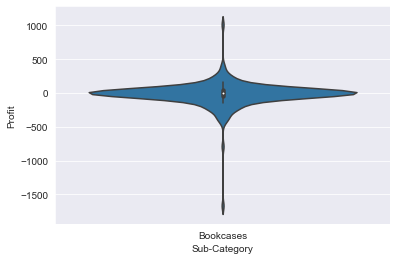

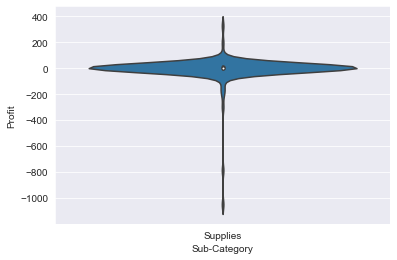

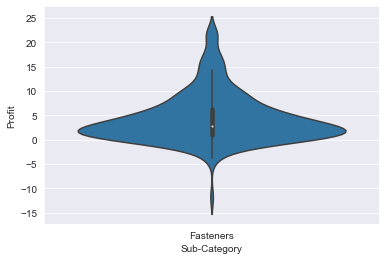

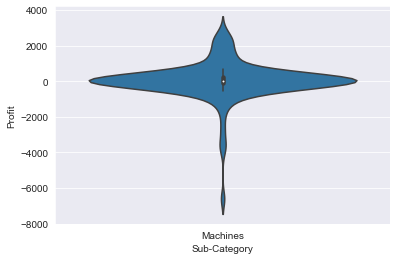

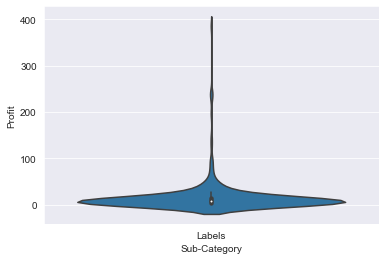

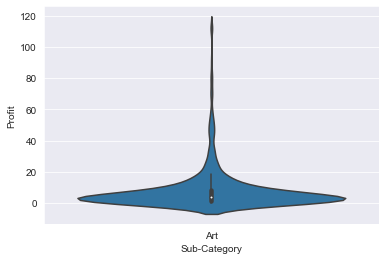

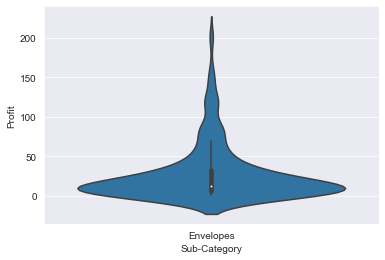

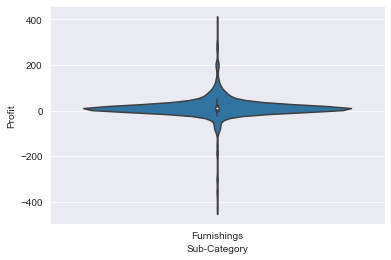

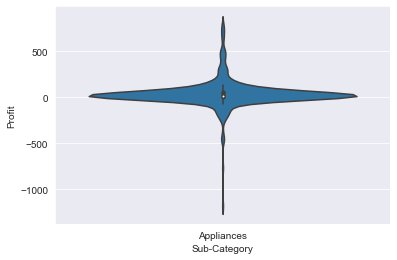

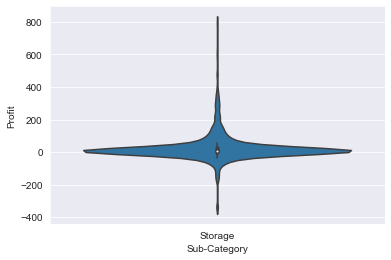

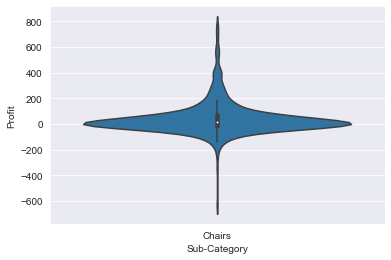

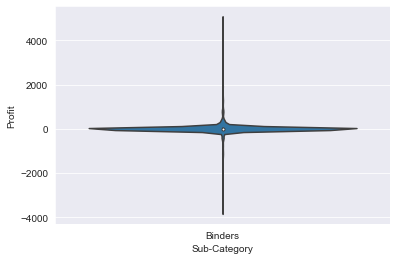

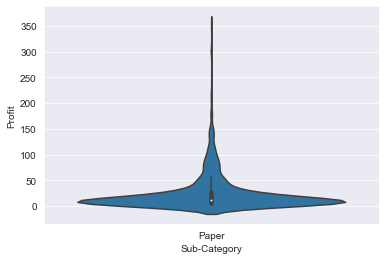

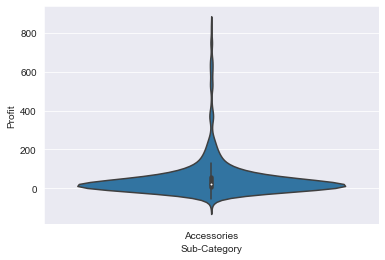

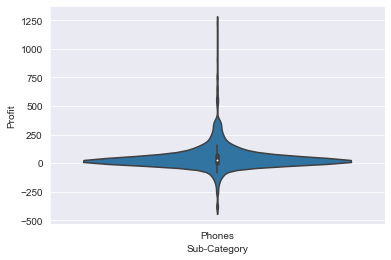

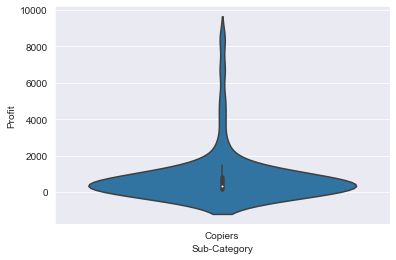

In [25]:
for i in df5.index:
    sns.violinplot(x='Sub-Category',y='Profit',data=data[data['Sub-Category']==i])
    mt.show()

In [26]:
df6 = data[['Profit','Discount']]
df6.head()

,Profit,Discount
0,41.9136,0.00
1,219.5820,0.00
2,6.8714,0.00
3,-383.0310,0.45
4,2.5164,0.20


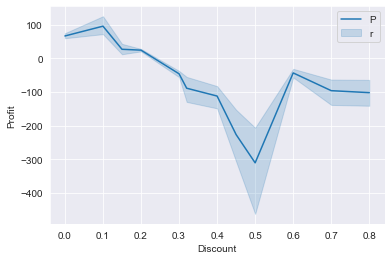

In [27]:
sns.lineplot(x='Discount',y='Profit',data=df6)
mt.legend('Profit')
mt.show()

0.1 is the optimal discount